In [1]:
import os
from keras.layers import *
from keras.models import *
from keras import optimizers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import database_trainings
data_trainings = np.loadtxt('Data_training.csv', delimiter=',')
x_train = data_trainings[:,0:36]
y_train = data_trainings[:,36:40]
#import database_tests
data_tests = np.loadtxt('Data_testing.csv', delimiter=',')
x_test = data_tests[:,0:36]
y_test = data_tests[:,36:40]

#Change into array data type
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [3]:
model = Sequential()
model.add(Dense(units=25, activation='relu', input_dim=36))
model.add(Dense(units=4, activation='softmax'))
model.compile(loss='mse', optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                925       
                                                                 
 dense_1 (Dense)             (None, 4)                 104       
                                                                 
Total params: 1029 (4.02 KB)
Trainable params: 1029 (4.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history=model.fit(
    x_train, y_train,
    epochs=5000, 
    validation_data=(x_test, y_test))

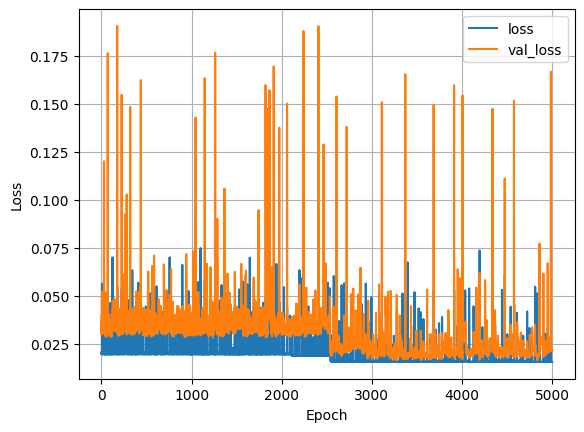

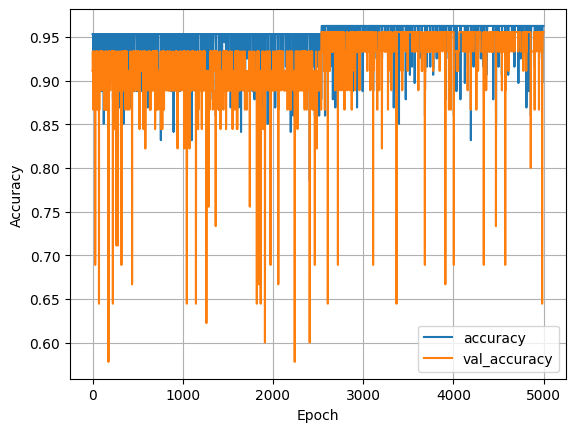

In [13]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()
plot_loss(history)
plot_accuracy(history)

In [14]:
model.save_weights('my_model_weights.h5')

In [15]:
y_preds=[]

#kiểm tra lỗi
for i, row in enumerate(x_test):   
    y_pred = model.predict(np.array([x_test[i][:]]))
    
    y_preds.append(y_pred)
    
heathy_t = 0# heathy_motor_correct_diagnosis = 0
heath_f = 0 # heathy_motor_wrong_diagnosis = 0
bearing_t =0 # bearing_correct_diagnosis = 0
bearing_f = 0 # bearing_wrong_diagnosis = 0
break_bar_t = 0 # break_bar_correct_diagnosis = 0
break_bar_f = 0 # break_bar_wrong_diagnosis = 0
short_t = 0 # shortcircuit_coil_stator_correct_diagnosis = 0
short_f = 0 # shortcircuit_coil_stator_wrong_diagnosis = 0



#thống kê lỗi
for i, row in enumerate(y_preds):
    row = y_preds[i]
    max_value = np.max(row)
    max_index = np.argmax(row)
    
    row2 = y_test[i]
    max_value2 = np.max(row2)
    max_index2 = np.argmax(row2)
    
#healthy motor    
    if max_index == 0:
        if max_index == max_index2:
            heathy_t = heathy_t + 1
        else:
            heath_f = heath_f + 1
#bearing fault            
    if max_index == 1:
        if max_index == max_index2:
            bearing_t = bearing_t + 1
        else:
            bearing_f = bearing_f + 1
#break bar roto
    if max_index == 2:
        if max_index == max_index2:
            break_bar_t = break_bar_t + 1
        else:
            break_bar_f = break_bar_f + 1
#shortcircuit coil stator
    if max_index == 3:
        if max_index == max_index2:
            short_t = short_t + 1
        else:
            short_f = short_f + 1

True_diagnosis = [heathy_t, bearing_t, break_bar_t, short_t]
False_diagnosis = [heath_f, bearing_f, break_bar_f, short_f]
            


1/1 [==============================] - 0s 21ms/step


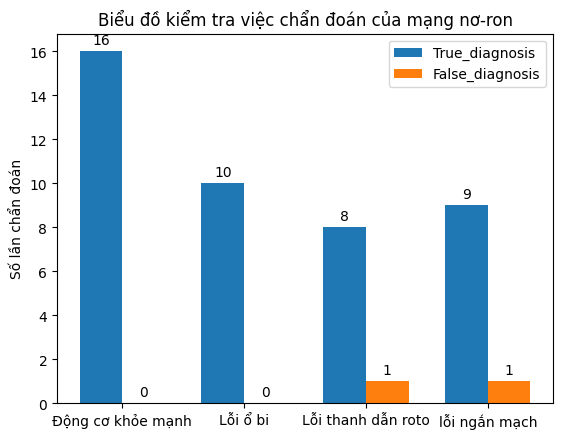

In [16]:
fault = ["Động cơ khỏe mạnh", "Lỗi ổ bi", "Lỗi thanh dẫn roto", "lỗi ngắn mạch"]
x = np.arange(len(fault))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, True_diagnosis, width, label='True_diagnosis')
rects2 = ax.bar(x + width/2, False_diagnosis, width, label='False_diagnosis')

ax.set_ylabel('Số lần chẩn đoán')
ax.set_title('Biểu đồ kiểm tra việc chẩn đoán của mạng nơ-ron')
ax.set_xticks(x)
ax.set_xticklabels(fault)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Vị trí text
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


In [ ]:
model = Sequential()
model.add(Dense(units=25, activation='relu', input_dim=36))
model.add(Dense(units=4, activation='softmax'))
model.compile(loss='mse', optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()
history=model.fit(
    x_train, y_train,
    epochs=5000, validation_data=(x_test, y_test)
                  )
